Question 3. (3 points)

a. Use the scikit-learn package to run Bagging and Random Forest on the heart-disease dataset and predict on its test set. Use cross-validation to find the best parameters for these algorithms.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
X_train = train.drop(columns=['Unnamed: 0','target'], axis=1)
y_train = train['target'].values
X_test = train.drop(columns=['Unnamed: 0','target'], axis=1)
y_test = train['target'].values

In [5]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

Bagging = BaggingClassifier().fit(X_train, y_train)
Bagging_pred = Bagging.predict(X_test)

RandomForest = RandomForestClassifier().fit(X_train, y_train)
RandomForest_pred = RandomForest.predict(X_test)

C:\Users\moham\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [6]:
clfs = {"Bagging":BaggingClassifier(n_estimators=100,
                                     oob_score=True,
                                     random_state=42),
        "RandomForest":RandomForestClassifier(n_estimators=100,
                                                       oob_score=True,
                                                       random_state=42)}

In [7]:
min_val= 15
max_val = 150
def n_estimators(X,y,model,min_val,max_val):
    val_range = range(min_val,max_val+1)
    error_rate = []
    for i in val_range:
        model.set_params(n_estimators=i)
        model.fit(X, y)
        oob_error = 1 - model.oob_score_
        error_rate.append(oob_error)
    plt.plot(val_range,error_rate)

Best n_estimator value:  117


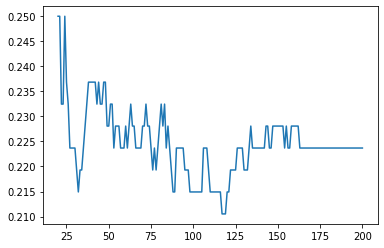

In [7]:
model = clfs['Bagging']
val_range = range(min_val,max_val+1)
error_rate = []
for i in val_range:
    model.set_params(n_estimators=i)
    model.fit(X_train, y_train)
    oob_error = 1 - model.oob_score_
    error_rate.append(oob_error)
plt.plot(val_range,error_rate)
print('Best n_estimator value: ', val_range[np.argmin(error_rate)])

15
105
145
85
145


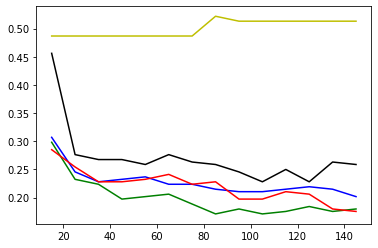

In [8]:
model = clfs['Bagging']
for type,color in [(1,'y'),(2,'k'),(3,'b'),(4,'g'),(5,'r')]:
    val_range = range(min_val,max_val+1,10)
    error_rate = []
    for i in val_range:
        model.set_params(n_estimators=i,max_samples = type)
        model.fit(X_train, y_train)
        oob_error = 1 - model.oob_score_
        error_rate.append(oob_error)
    plt.plot(val_range,error_rate,color=color)
    print(val_range[np.argmin(error_rate)])

55
175
80
65
170


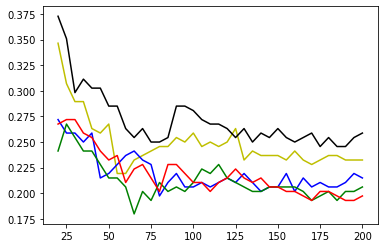

In [7]:
model = clfs['Bagging']
for type,color in [(1,'y'),(2,'k'),(3,'b'),(4,'g'),(5,'r')]:
    val_range = range(min_val,max_val+1,5)
    error_rate = []
    for i in val_range:
        model.set_params(n_estimators=i,max_features = type)
        model.fit(X_train, y_train)
        oob_error = 1 - model.oob_score_
        error_rate.append(oob_error)
    plt.plot(val_range,error_rate,color=color)
    print(val_range[np.argmin(error_rate)])

Best n_estimator value:  53


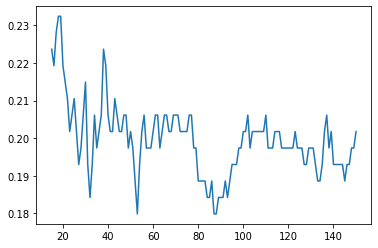

In [9]:
model = clfs['RandomForest']
val_range = range(min_val,max_val+1)
error_rate = []
for i in val_range:
    model.set_params(n_estimators=i)
    model.fit(X_train, y_train)
    oob_error = 1 - model.oob_score_
    error_rate.append(oob_error)
plt.plot(val_range,error_rate)
print('Best n_estimator value: ', val_range[np.argmin(error_rate)])

42
45
75
33
51


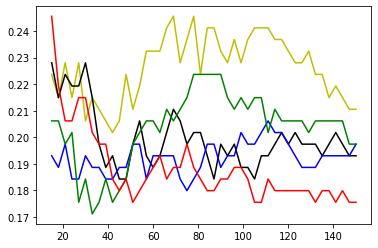

In [10]:
model = clfs['RandomForest']
for type,color in [(1,'y'),(2,'k'),(3,'b'),(4,'g'),(5,'r')]:
    val_range = range(min_val,max_val+1,3)
    error_rate = []
    for i in val_range:
        model.set_params(n_estimators=i,max_depth = type)
        model.fit(X_train, y_train)
        oob_error = 1 - model.oob_score_
        error_rate.append(oob_error)
    plt.plot(val_range,error_rate,color=color)
    print(val_range[np.argmin(error_rate)])

140
45
40
140
145


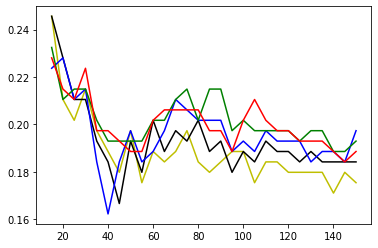

In [11]:
model = clfs['RandomForest']
for type,color in [(2,'y'),(3,'k'),(4,'b'),(5,'g'),(6,'r')]:
    val_range = range(min_val,max_val+1,5)
    error_rate = []
    for i in val_range:
        model.set_params(n_estimators=i,min_samples_split = type)
        model.fit(X_train, y_train)
        oob_error = 1 - model.oob_score_
        error_rate.append(oob_error)
    plt.plot(val_range,error_rate,color=color)
    print(val_range[np.argmin(error_rate)])

145
35
85
45
30


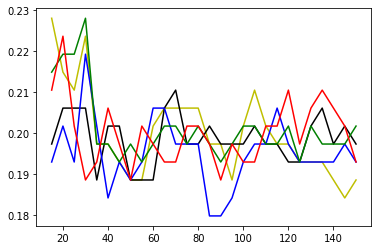

In [12]:
model = clfs['RandomForest']
for type,color in [(1,'y'),(2,'k'),(3,'b'),(4,'g'),(5,'r')]:
    val_range = range(min_val,max_val+1,5)
    error_rate = []
    for i in val_range:
        model.set_params(n_estimators=i,min_samples_leaf = type)
        model.fit(X_train, y_train)
        oob_error = 1 - model.oob_score_
        error_rate.append(oob_error)
    plt.plot(val_range,error_rate,color=color)
    print(val_range[np.argmin(error_rate)])

30
30
30


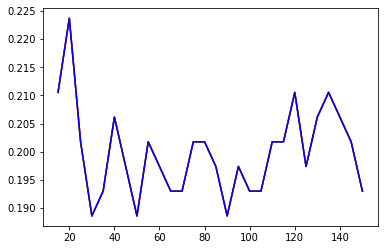

In [13]:
model = clfs['RandomForest']
for type,color in [('auto','g'),('sqrt','r'),('log2','b')]:
    val_range = range(min_val,max_val+1,5)
    error_rate = []
    for i in val_range:
        model.set_params(n_estimators=i,max_features = type)
        model.fit(X_train, y_train)
        oob_error = 1 - model.oob_score_
        error_rate.append(oob_error)
    plt.plot(val_range,error_rate,color=color)
    print(val_range[np.argmin(error_rate)])

b. On the same axes, plot the ROC curves for the two algorithms with the best parameters that you found in 3a. Annotate their AUC values and compare their performance. 

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Bagging = BaggingClassifier(n_estimators=117,max_samples=5,max_features=2,random_state=42).fit(X_train, y_train)
Bagging_pred = Bagging.predict(X_test)

confusion_matrix = pd.crosstab(y_test, Bagging_pred)
print('Accuracy: ', metrics.accuracy_score(y_test, Bagging_pred))
predict_probabilities = Bagging.predict_proba(X_test)
fpr, tpr, thr = metrics.roc_curve(y_test, predict_probabilities[:,1])
plt.plot(fpr, tpr, 'navy', lw=1)

In [ ]:
RandomForest = RandomForestClassifier(n_estimators=53, max_depth=3, min_samples_split=5, min_samples_leaf=3,max_features='sqrt',random_state=42).fit(X_train, y_train)
RandomForest_pred = RandomForest.predict(X_test)
confusion_matrix = pd.crosstab(y_test, RandomForest_pred)
print('Accuracy: ', metrics.accuracy_score(y_test, RandomForest_pred))
predict_probabilities = RandomForest.predict_proba(X_test)
fpr, tpr, thr = metrics.roc_curve(y_test, predict_probabilities[:,1])
plt.plot(fpr, tpr, 'navy', lw=1)

c. Explain your results in 3b. Why might the results vary across algorithms?